<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:35px;background-color:#4064C6">
    <span style="color: black;">  💳 Credit Card Fraud Detection 💳 </span>
</h3>

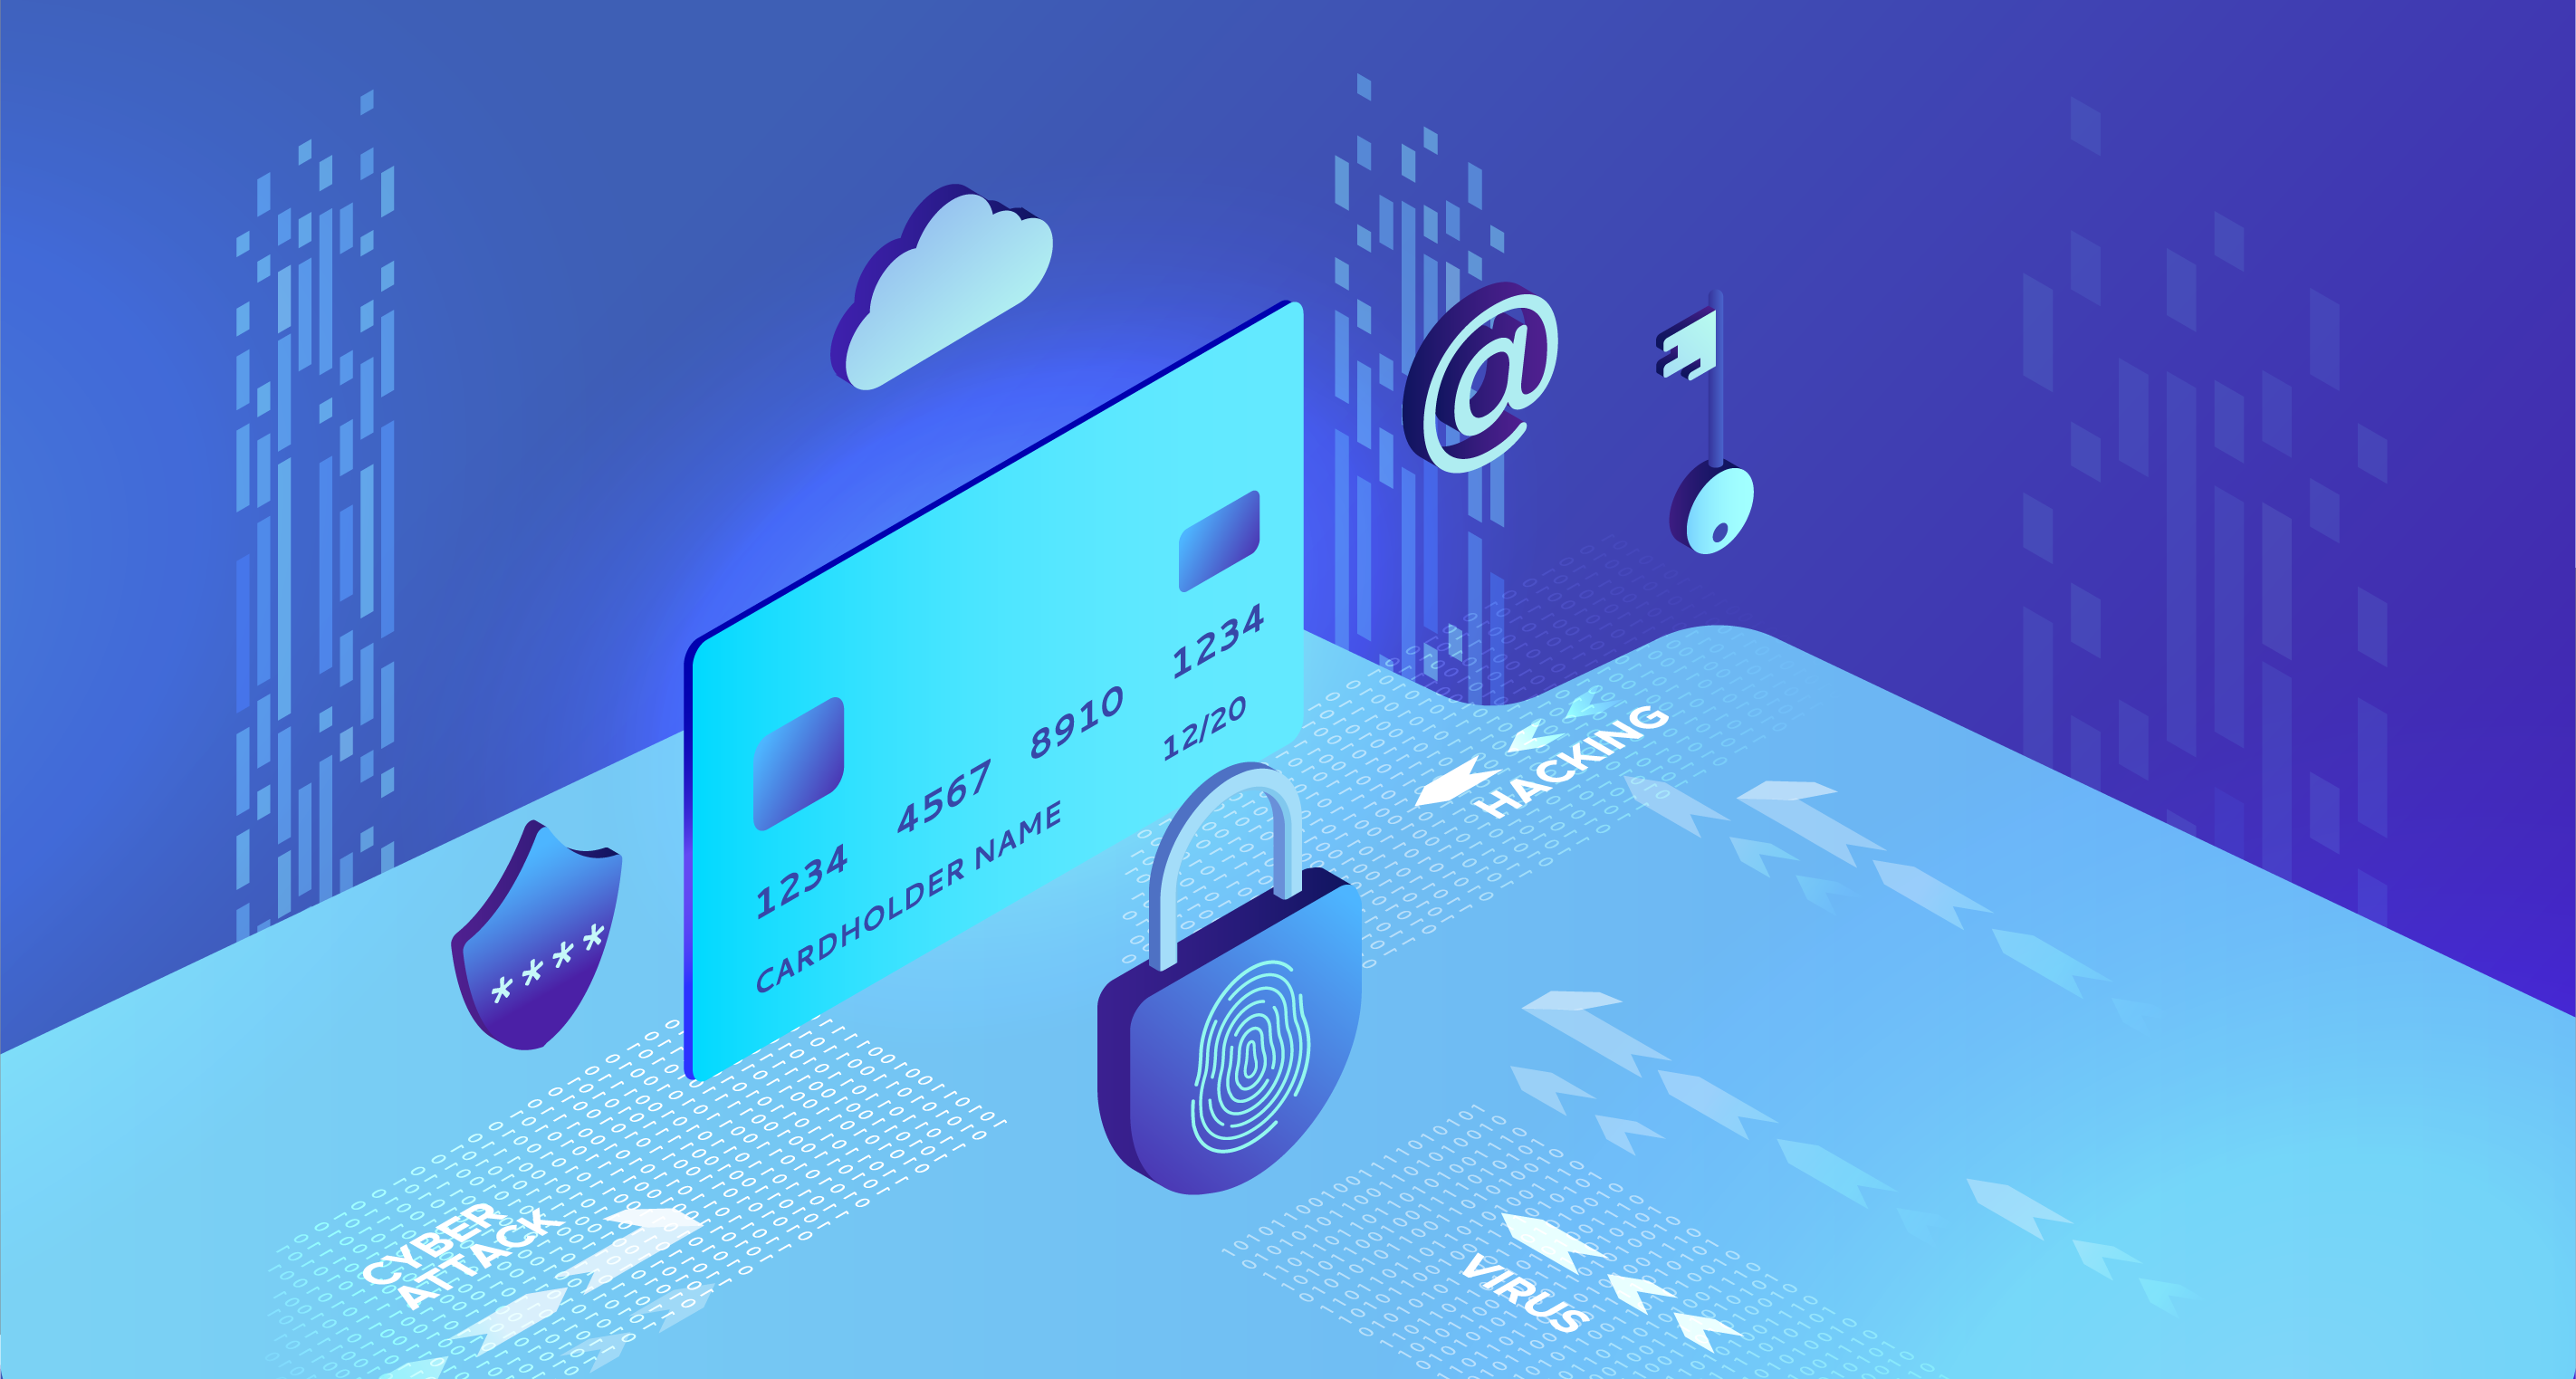

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#4064C6">
    <span style="color: black;">📚 Importing Libraries 📚 </span>
</h3>

In [32]:
pip install scikit-learn==0.24.2 imbalanced-learn==0.8.0


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio

from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve


import warnings
warnings.filterwarnings('ignore')

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#4064C6">
    <span style="color: black;">⏳ Loading the dataset ⏳</span>
</h3>

In [7]:
credit_card = pd.read_csv('creditcard.csv', encoding = 'utf-8')

In [8]:
credit_card.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [9]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#4064C6">
    <span style="color: black;">🧹 Data Cleaning 🧹</span>
</h3>

In [10]:
# Checking null values

credit_card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# Dropping the duplicated values
credit_card = credit_card.drop_duplicates()

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#4064C6">
    <span style="color: black;">🧩 Feature Engineering 🧩</span>
</h3>

In [12]:
credit_card['Hour'] = credit_card['Time'].apply(lambda x : np.ceil(float(x)/3600) % 24)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#4064C6">
    <span style="color: black;">📊 Exploratory Data Analysis 📊</span>
</h3>

In [13]:
credit_card.describe()

Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.689830      -0.769031      -0.552509   
50%        -0.022248      -0.053468      -0.275168       0.040859   
75%         0.739647       0.612218       0.396792       0.570474   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9  ...            V22            V23  \
count  283726.000000  283726.000000  ...  283726.000000  283726.000000   
mean       -0.000854      -0.001596  ...      -0.000015       0.000198   
std         1.179054       1.095492  ...       0.724550       0.623702   
min       -73.216718     -13.434066  ...     -10.933144     -44.807735   
25%        -0.208828      -0.644221  ...      -0.542700      -0.161703   
50%         0.021898      -0.052596  ...       0.006675      -0.011159   
75%         0.325704       0.595977  ...       0.528245       0.147748   
max        20.007208      15.594995  ...      10.503090      22.528412   

                 V24            V25            V26            V27  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000214      -0.000232       0.000149       0.001763   
std         0.605627       0.521220       0.482053       0.395744   
min        -2.836627     -10.295397      -2.604551     -22.565679   
25%        -0.354453      -0.317485      -0.326763      -0.070641   
50%         0.041016       0.016278      -0.052172       0.001479   
75%         0.439738       0.350667       0.240261       0.091208   
max         4.584549       7.519589       3.517346      31.612198   

                 V28         Amount          Class           Hour  
count  283726.000000  283726.000000  283726.000000  283726.000000  
mean        0.000547      88.472687       0.001667      14.124909  
std         0.328027     250.399437       0.040796       6.229348  
min       -15.430084       0.000000       0.000000       0.000000  
25%        -0.052818       5.600000       0.000000      10.000000  
50%         0.011288      22.000000       0.000000      15.000000  
75%         0.078276      77.510000       0.000000      19.000000  
max        33.847808   25691.160000       1.000000      23.000000  

[8 rows x 32 columns]

In [14]:
fig = px.pie(credit_card, names='Class', title='Distribution of Class Column', color_discrete_sequence=['#4A1A22', '#78545A'], hole=0.4)  
fig.update_layout(showlegend=True, legend=dict(title='Class', itemsizing='constant'), plot_bgcolor='white' )
fig.show()

In [15]:
average_time_per_class = credit_card.groupby('Class')['Time'].mean().reset_index()
fig = px.bar(average_time_per_class, x='Class', y='Time', text = 'Time', title='Average Time for Each Fraudulent and Non Fraudulent Class')

fig.update_layout(xaxis_title='Class', yaxis_title='Average Time', plot_bgcolor='white' )
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', marker_color=['#4A1A22', '#78545A'])
fig.update_xaxes(tickvals=[0, 1], ticktext=['0', '1'])
fig.show()

In [16]:
average_amount_per_class = credit_card.groupby('Class')['Amount'].median().reset_index()
fig = px.bar(average_amount_per_class, x='Class', y='Amount', text = 'Amount', title='Average Amount for Each Fraudulent and Non Fraudulent Class', color_discrete_sequence=['#4A1A22', '#78545A'])
fig.update_layout(xaxis_title='Class', yaxis_title='Average Amount', plot_bgcolor='white')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', marker_color=['#4A1A22', '#78545A'])
fig.update_xaxes(tickvals=[0, 1], ticktext=['0', '1'])
fig.show()

In [17]:
hourly_transaction_counts = credit_card.groupby(['Hour', 'Class']).size().unstack()
hourly_transaction = pd.DataFrame(hourly_transaction_counts)
hourly_transaction.head(24)

Class      0   1
Hour            
0.0    10868  17
1.0     7639   6
2.0     4200  10
3.0     3258  48
4.0     3471  17
5.0     2180  23
6.0     2977  11
7.0     4074   9
8.0     7209  23
9.0    10222   9
10.0   15753  16
11.0   16543   8
12.0   16729  53
13.0   15358  17
14.0   15308  17
15.0   16495  23
16.0   16347  26
17.0   16378  22
18.0   16100  28
19.0   16928  28
20.0   15549  19
21.0   16688  18
22.0   17618  16
23.0   15361   9

In [18]:
fig = px.bar(hourly_transaction, x = hourly_transaction.index, y = hourly_transaction.columns, barmode='group', color_discrete_sequence=['#4A1A22', '#78545A'])
fig.update_layout(title_text="Number of transactions with respect to hour of the day", xaxis_title="Hour", yaxis_title="Count of Transactions", plot_bgcolor = 'white')
fig.show()

In [19]:
class_0_df = hourly_transaction[0].reset_index()
fig_class_0 = px.bar(class_0_df, x='Hour', y=0, title="Distribution of non fraud transactions in each hour", labels={'0': 'Count of Transactions'}, color_discrete_sequence = ['#4A1A22'])
fig_class_0.update_layout(plot_bgcolor='white')
fig_class_0.show()

In [20]:
class_1_df = hourly_transaction[1].reset_index()
fig_class_1 = px.bar(class_1_df, x='Hour', y=1, title="Distribution of fraud transactions in each hour", labels={'1': 'Count of Transactions'}, color_discrete_sequence=['#78545A'])
fig_class_1.update_layout(plot_bgcolor='white')
fig_class_1.show()

In [21]:
average_amount_per_hour = credit_card.groupby('Hour')['Amount'].median().reset_index()
fig = px.line(average_amount_per_hour, x='Hour', y='Amount', title='Average Amount of Transactions for Each Hour', labels={'Hour': 'Hour of the Day', 'Amount': 'Average Transaction Amount'}, line_shape='spline', color_discrete_sequence = ['#4A1A22'])
fig.update_layout(plot_bgcolor='white')
fig.show()

In [22]:
average_amount_per_hour_class = credit_card.groupby(['Hour', 'Class'])['Amount'].median().reset_index()
fig = px.line(average_amount_per_hour_class, x='Hour', y='Amount', color='Class', title='Average transaction amount for non fraud and fraud events in each hour', labels={'Hour': 'Hour of the Day', 'Amount': 'Average Transaction Amount', 'Class': 'Class'}, line_shape='spline', color_discrete_sequence=['#4A1A22', '#B9A6A9'])
fig.update_layout(plot_bgcolor='white')
fig.show()

**Insights:**
* The dataset is highly imbalanced as the class for non fraud transactions constitutes 99.8% of the data
* It can be clearly seen that the average time for fraudulent transactions is less than fraudulent ones.
* Following this, average transaction amount is also less in fraudulent transactions compared to non fraudulent ones.
* The least number of transactions done are between 1am to 8am
* The highets number of non fraud transactions are done around 10pm
* The highest number of fraud transactions are done at 3am and 12pm
* Irrespective of fraud and non fraud class, the minimum average transaction amount is 11.88K, around 6am to 7am. However, the highest average transaction amount is 33 around 11am
* In case of fraudulent transactions, it can be clearly seen that the highest average amount transaction is done around 1am with a value of 230. Furthermore, the average transaction amount fluctuates a lot in different hours of the day
* In case of non fraud transactions, the average transaction amount doesn't seems to have any noticeable flucations during the whole day.


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#4064C6">
    <span style="color: black;">⚙️ Data Preprocessing ⚙️</span>
</h3>

---
### 1. Feature Scaling
---

In [23]:
sc = StandardScaler()
credit_card['std_Amount'] = sc.fit_transform(credit_card['Amount'].values.reshape (-1,1))

#removing Amount
credit_card = credit_card.drop(columns = ["Amount", "Time"], axis=1)

---
### 2. Class Imbalance
---

In [24]:
credit_card.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [34]:
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [35]:
# Keeping the predictor and target variable

X = credit_card.drop('Class', axis = 1)
y = credit_card['Class']

In [36]:
X_under, Y_under = undersample.fit_resample(X, y)

---
### 3. Splitting into training and testing
---

In [37]:
# Splitting the dataset into training and testing parts

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size = 0.3, random_state = 2)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#4064C6">
    <span style="color: black;">🎯 Model Building 🎯 </span>
</h3>

---
### 1. Baseline Model Building
---

In [38]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)

---
### 2. Other Models Buidling
---

In [39]:
svc = SVC(kernel = 'linear',C = 0.1)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:#4064C6">
    <span style="color: black;">⚡ Model Evaluation ⚡ </span>
</h3>

---
### 1. Baseline Model Evaluation
---

Mean Cross-Validation Score: 0.98
The ROC AUC Score is: 0.95 



The classification report of Logistic Regressor is below :  


               precision    recall  f1-score   support

           0       0.95      1.00      0.97       280
           1       0.99      0.90      0.94       146

    accuracy                           0.96       426
   macro avg       0.97      0.95      0.96       426
weighted avg       0.96      0.96      0.96       426
 



The confusion matrix is below : 


<AxesSubplot:>

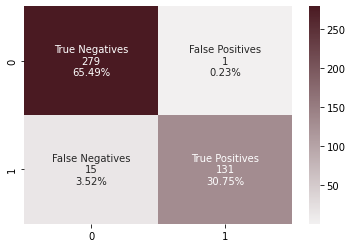

In [40]:
lg_cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 4, random_state = 2)
lg_scores = cross_val_score(lg, X_train, y_train, cv = lg_cv, scoring = 'roc_auc').mean()
print(f"Mean Cross-Validation Score: {lg_scores:.2f}")
#------------------------------------------------------------------------------

print(f"The ROC AUC Score is: {roc_auc_score(y_test, lg_pred):.2f}", '\n\n\n')
#------------------------------------------------------------------------------

lg_report = classification_report(y_test, lg_pred)
print('The classification report of Logistic Regressor is below : ', '\n\n\n', lg_report, '\n')
#------------------------------------------------------------------------------

fpr, tpr, _ = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
fig = make_subplots(rows=1, cols=1, subplot_titles=['ROC AUC Plot'])
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='#4A1A22')))
fig.update_layout(xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', plot_bgcolor='white')
fig.add_annotation(x=0.5, y=0.5, text='AUC = %0.2f' % roc_auc, showarrow=False, font=dict(color='#4A1A22'))
pio.show(fig)
#------------------------------------------------------------------------------

print('The confusion matrix is below : ')
cm = confusion_matrix(y_test, lg_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
cmap = sns.light_palette("#4A1A22", as_cmap=True)
sns.heatmap(cm, annot = labels, cmap = cmap, fmt = '')

---
### 2. SVC Model Evaluation
---

Mean Cross-Validation Score: 0.98
The ROC AUC Score is: 0.95 



The classification report of Logistic Regressor is below :  


               precision    recall  f1-score   support

           0       0.94      1.00      0.97       280
           1       1.00      0.88      0.94       146

    accuracy                           0.96       426
   macro avg       0.97      0.94      0.95       426
weighted avg       0.96      0.96      0.96       426
 



The confusion matrix is below :  



<AxesSubplot:>

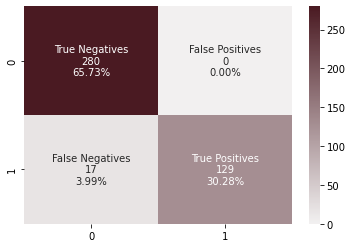

In [41]:
svc_cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 4, random_state = 2)
svc_scores = cross_val_score(svc, X_train, y_train, cv = svc_cv, scoring = 'roc_auc').mean()
print(f"Mean Cross-Validation Score: {lg_scores:.2f}")
#------------------------------------------------------------------------------

print(f"The ROC AUC Score is: {roc_auc_score(y_test, lg_pred):.2f}", '\n\n\n')
#------------------------------------------------------------------------------

svc_report = classification_report(y_test, svc_pred)
print('The classification report of Logistic Regressor is below : ', '\n\n\n', svc_report, '\n')
#------------------------------------------------------------------------------

fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
roc_auc = auc(fpr, tpr)
fig = make_subplots(rows=1, cols=1, subplot_titles=['ROC AUC Plot'])
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='#4A1A22')))
fig.update_layout(xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', plot_bgcolor='white')
fig.add_annotation(x=0.5, y=0.5, text='AUC = %0.2f' % roc_auc, showarrow=False, font=dict(color='#4A1A22'))
pio.show(fig)
#------------------------------------------------------------------------------

print('The confusion matrix is below : ', '\n')
cm = confusion_matrix(y_test, svc_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
cmap = sns.light_palette("#4A1A22", as_cmap=True)
sns.heatmap(cm, annot = labels, cmap = cmap, fmt = '')

<div style="border-radius:10px; border:#000000 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=black>📊 Insights:</font></h3>

* The performance evaluation revealed that the Logistic Regression performed well and gave an f1-score of 0.96. The precision-recall curve is indication a great performance with almost touching the top right corner having recall on x axis and precision on y axis

**Insights:**
* The performance evaluation revealed that the Logistic Regression performed well and gave an f1-score of 0.96. The precision-recall curve is indication a great performance with almost touching the top right corner having recall on x axis and precision on y axis